In [2]:
# -*- coding: utf-8 -*-
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as spstats
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

# import IPython.core.display as di
# di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# 2018.1.22 Notebook 
李曦嵘　　634602068@qq.com　　武汉大学电子信息学院

## 1 QR分解的定义
>实数矩阵A的QR分解是把A分解为
$$
A=QR
$$
这里的$Q$是正交矩阵（意味着$Q^TQ = I$）而$R$是上三角矩阵。  
更一般的说，我们可以因数分解复数 $m\times n$矩阵（有着$m \ge n$）为 $m\times m$ 酉矩阵（在$Q^* Q = I$的意义上）和 $m\times n$上三角矩阵的乘积。  
如果A是非奇异的，且限定R 的对角线元素为正，则这个因数分解是唯一的。  
[维基百科：QR分解](https://zh.wikipedia.org/wiki/QR%E5%88%86%E8%A7%A3)

对于m×n的满秩矩阵A有：

\begin{align}
A_{m\times n}&=Q_{m\times m}	\bullet R_{m\times n}\\
或写成  A_{m\times n}&=Q_{m\times n}	\bullet R_{n\times n}
\end{align}

<img src="http://img.blog.csdn.net/20170114101641296?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdGx6aGF0YW8=/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast">
其中，$Q^T\bullet Q=I$(即Q为正交矩阵)，R为非奇异上三角矩阵(即矩阵R的对角线下面的元素全为0)。

将A分解成这样的矩阵Q和R的过程就是QR分解。当R的对角线元素为正时，该分解唯一。

## 2 QR分解的求解过程
### 2.1 Gram-Schmidt正交化
在三维空间存在直角坐标系，其中任意一点都可以由(x,y,z)坐标唯一确定，在这个坐标系中，X、Y、Z三轴都是相互正交(垂直)的。那么推广到n维欧式空间，就是n个线性无关的基向量组成的一组基，n维欧式空间中任意一位置，都可以由这组基线性表示。

那么就引出来另一个问题，怎么得到一组两两相互正交的正交基呢?这一过程就是Gram–Schmidt正交化。

现在设 $\alpha_1, \alpha_2, \alpha_3 ,\cdots ,\alpha_n$ 是欧式空间 $R^n$ 的一组基，我们希望由此得到 $\beta_1, \beta_2, \beta_3 ,\cdots ,\beta_n$ 这组正交基。  
先令 $\beta_1 = \alpha_1$，那么如何得到 $\beta_2$ 呢？可以将 $\alpha_2$ 正交分解为 $\alpha_2=k\beta_1+r_1=k\beta_1+\beta_2$ 如下图所示：

<img src="http://img.blog.csdn.net/20150525203312381?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdTAxMDk0NTY4Mw==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center" width="300">

由此可以得到 $0=\beta_2\bullet \beta_1=(\alpha_2-k\beta_1)\bullet\beta_1=\alpha_2\bullet\beta_1-k(\beta_1\bullet\beta_1)$

因此，$k=\frac{\alpha_2\bullet\beta_1}{\beta_1\bullet\beta_1}$（即向量$\alpha_2$在向量$\beta_1$上的投影长度）。 

$$
\beta_2=\alpha_2-\frac{\alpha_2\bullet\beta_1}{\beta_1\bullet\beta_1}\beta_1
$$

那么$\beta_3$呢？显然可以由相同的方法得出，如下图所示：

<img src="http://img.blog.csdn.net/20150525212155052?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdTAxMDk0NTY4Mw==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast" width="300">

可得
$$
\beta_3=\alpha_3-\frac{\alpha_3\bullet\beta_2}{\beta_2\bullet\beta_2}\beta_2-\frac{\alpha_3\bullet\beta_1}{\beta_1\bullet\beta_1}\beta_1
$$
推广到第j个正交向量可得：

\begin{align}
\beta_1 &= \alpha_1 \\
\beta_j &= \alpha_j-\sum^{j-1}_{k=1} \frac {\alpha_j \bullet \beta_k}{\beta_k \bullet \beta_k}\beta_k
\end{align}

若再将$\beta$单位化，即令

$$
\varepsilon_i=\frac{\beta_i}{\left\|\beta_i\right \|}
$$

则$\varepsilon$即为标准化正交向量组。

### 2.2 QR分解

对于可逆矩阵A（$A\in R^n$）的列向量组 $\alpha_1, \alpha_2, \alpha_3 ,\cdots ,\alpha_n$ 进行Gram–Schmidt正交化，可得标准正交向量 $\varepsilon_1, \varepsilon_2, \varepsilon_3 ,\cdots ,\varepsilon_n$ :

\begin{align}
\varepsilon_1 &= \frac{\beta_1}{\left\|\beta_1\right \|} = t_{11}\alpha_1\\
\varepsilon_2 &= \frac{\beta_2}{\left\|\beta_2\right \|} = t_{12}\alpha_1+t_{22}\alpha_2\\
&\vdots\\
\varepsilon_n &= \frac{\beta_n}{\left\|\beta_n\right \|} = t_{1n}\alpha_1+t_{2n}\alpha_2+\cdots +t_{nn}\alpha_n\\
\end{align}

用矩阵表达即：

\begin{align}
(\varepsilon_1, \varepsilon_2, \cdots ,\varepsilon_n)=(\alpha_1, \alpha_2, \cdots ,\alpha_n)
\begin{bmatrix}
t_{11}  & \cdots & t_{1n}     \\
\vdots & \ddots & \vdots \\
0      & \cdots & t_{nn}
\end{bmatrix}
\end{align}

令$T=(t_{ij})$，$A=(\alpha_1, \alpha_2, \cdots ,\alpha_n)$，$Q=(\varepsilon_1, \varepsilon_2, \cdots ,\varepsilon_n)$。则有

\begin{align}
Q &= AT\\
A &= QT^{-1}
\end{align}

又上三角矩阵的逆矩阵也是上三角矩阵，因此记$R=T^{-1}$，则$A=QR$。

> 这里也可这样理解：  
可逆矩阵A可由其得到的标准正交向量$\varepsilon_1, \varepsilon_2, \varepsilon_3 ,\cdots ,\varepsilon_n$来表示。
即
\begin{align}
(\alpha_1, \alpha_2, \cdots ,\alpha_n)=(\varepsilon_1, \varepsilon_2, \cdots ,\varepsilon_n)
\begin{bmatrix}
r_{11}  & \cdots & r_{1n}     \\
\vdots & \ddots & \vdots \\
0      & \cdots & r_{nn}
\end{bmatrix}
\end{align}
矩阵Q为标准正交矩阵，R为上三角矩阵。

### MATLAB

MATLAB以qr函数来执行QR分解法，其语法为  
$$
[Q,R]=qr(A)  
$$
其中Q代表正规正交矩阵，而R代表上三角形矩阵。  
此外，原矩阵A不必为正方矩阵； 如果矩阵A大小为m\*n，则矩阵Q大小为m\*m，矩阵R大小为m\*n。
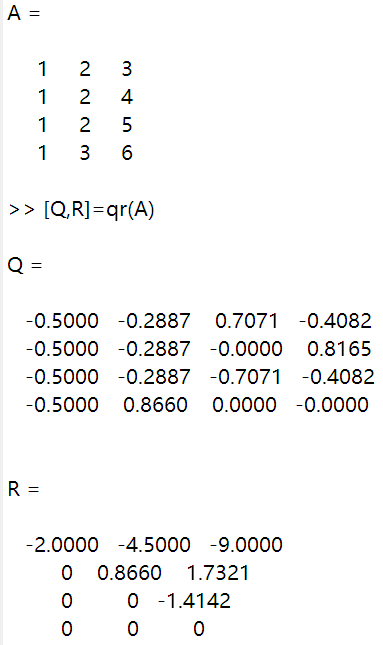

### Python
在numpy包中直接调用linalg.qr即可求矩阵的QR分解。示例如下：

In [32]:
print(''.center(50,'='))
a = np.matrix([[1, 2 , 3],
               [1, 2 , 4],
               [1, 2, 5]])
print('a=',a)

print('QR分解'.center(50,'='))

q,r=np.linalg.qr(a, 'complete')

b = np.around([np.dot(q,r)], decimals = 2) 

c = np.around([np.dot(q,q.T)], decimals = 10) 

print('q=',q,'r=',r,'q*r=',b,'q*q=',c,sep='\n\n')

print('end'.center(50,'='))


a= [[1 2 3]
 [1 2 4]
 [1 2 5]]
=======================QR分解=======================
q=

[[ -5.77350269e-01   8.16496581e-01  -8.75605293e-17]
 [ -5.77350269e-01  -4.08248290e-01  -7.07106781e-01]
 [ -5.77350269e-01  -4.08248290e-01   7.07106781e-01]]

r=

[[ -1.73205081e+00  -3.46410162e+00  -6.92820323e+00]
 [  0.00000000e+00  -6.26594804e-17  -1.22474487e+00]
 [  0.00000000e+00   0.00000000e+00   7.07106781e-01]]

q*r=

[[[ 1.  2.  3.]
  [ 1.  2.  4.]
  [ 1.  2.  5.]]]

q*q=

[[[ 1.  0.  0.]
  [ 0.  1. -0.]
  [ 0. -0.  1.]]]
=======================end========================


In [10]:
help (np.linalg.qr)

Help on function qr in module numpy.linalg.linalg:

qr(a, mode='reduced')
    Compute the qr factorization of a matrix.
    
    Factor the matrix `a` as *qr*, where `q` is orthonormal and `r` is
    upper-triangular.
    
    Parameters
    ----------
    a : array_like, shape (M, N)
        Matrix to be factored.
    mode : {'reduced', 'complete', 'r', 'raw', 'full', 'economic'}, optional
        If K = min(M, N), then
    
        'reduced'  : returns q, r with dimensions (M, K), (K, N) (default)
        'complete' : returns q, r with dimensions (M, M), (M, N)
        'r'        : returns r only with dimensions (K, N)
        'raw'      : returns h, tau with dimensions (N, M), (K,)
        'full'     : alias of 'reduced', deprecated
        'economic' : returns h from 'raw', deprecated.
    
        The options 'reduced', 'complete, and 'raw' are new in numpy 1.8,
        see the notes for more information. The default is 'reduced' and to
        maintain backward compatibility with